In [2]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [3]:
edge_list = [(0,2),(0,1),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [4]:
goal = 7

In [5]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [6]:
position = nx.spring_layout(G)

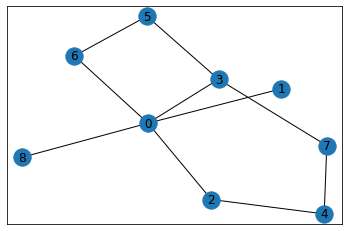

In [7]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [8]:
SIZE_MATRIX = 9

In [9]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX,SIZE_MATRIX)))
R *= -1

In [10]:
for edge in edge_list:
    print(edge)
    if edge[1] == goal:
        #R[0,1]
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        #R[1,0]
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0 

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [11]:
R[goal,goal] = 100

In [12]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [13]:
gamma = 0.8

In [14]:
Q = np.matrix(np.zeros([SIZE_MATRIX,SIZE_MATRIX]))

In [15]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row >= 0)[1]

    return available_actions

In [17]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action

In [18]:
def update(current_state, action, gamma):
    #searching for the max value of the following action
    #search the current Q-table row and select the action with maximum Q-value
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    print('max_index', max_index.shape)

    #if there are multiple actions with the same maximum Q-value, choose one of them
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    #appending the discounted future reward to the current one
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    
    print('max_value', R[current_state, action] + gamma * max_value)

In [19]:
initial_state = 0

In [20]:
available_actions = get_available_actions(initial_state)

In [21]:
print(available_actions)

[1 2 3 6 8]


In [22]:
 action = sample_next_action(available_actions)

In [23]:
print(action)

1


In [24]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


In [25]:
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))

    available_actions = get_available_actions(current_state)
    action = sample_next_action(available_actions)

    update(current_state, action, gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 64.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 64.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 80.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_val

In [26]:
print('trained Q matrix:')
pd.DataFrame(Q)

trained Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,249.35629,311.695362,393.35629,0.00000,0.000000,249.356290,0.000000,249.35629
1,314.685032,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
2,314.685032,0.00000,0.000000,0.00000,393.35629,0.000000,0.000000,0.000000,0.00000
3,311.695362,0.00000,0.000000,0.00000,0.00000,314.685032,0.000000,491.695362,0.00000
4,0.000000,0.00000,314.685032,0.00000,0.00000,0.000000,0.000000,491.695362,0.00000
5,0.000000,0.00000,0.000000,393.35629,0.00000,0.000000,251.748025,0.000000,0.00000
6,314.685032,0.00000,0.000000,0.00000,0.00000,314.685032,0.000000,0.000000,0.00000
7,0.000000,0.00000,0.000000,393.35629,393.35629,0.000000,0.000000,491.695362,0.00000
8,314.685032,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000


In [27]:
print('normalized Q matrix:')
pd.DataFrame(Q/np.max(Q)*100)

normalized Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,50.713574,63.391967,80.0,0.0,0.0,50.713574,0.0,50.713574
1,64.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,64.000000,0.000000,0.000000,0.0,80.0,0.0,0.000000,0.0,0.000000
3,63.391967,0.000000,0.000000,0.0,0.0,64.0,0.000000,100.0,0.000000
4,0.000000,0.000000,64.000000,0.0,0.0,0.0,0.000000,100.0,0.000000
5,0.000000,0.000000,0.000000,80.0,0.0,0.0,51.200000,0.0,0.000000
6,64.000000,0.000000,0.000000,0.0,0.0,64.0,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,80.0,80.0,0.0,0.000000,100.0,0.000000
8,64.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [28]:
current_state = 0
steps = [current_state]

In [29]:
while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [30]:
print('most efficient path:')
print(steps)

most efficient path:
[0, 3, 7]
